### Shmuel's Feedback Notes

Higher resolution distribution. 
Only customers that are higher than 10 months. Change "10" based on the higher resolution. 
Only customers that are smaller than 10 months

~~Add XGBoost~~
~~Try to tune the random forest and xgboost and see if they outperform logistic regression.~~
~~number of trees and depth of the trees. # of the trees approximately similar to the number of the features.~~
~~Also for the max depth, it should be small. It should be simple trees (so that it doesn't overfit) try 2 & 7 of max depth.~~

Monthly charges:
Distribution of Churned 
Distribution of non-churned 

Find weakness of the model. Where the analysis not really optimal. Discuss that in the summary 

Add conclusion section and Summarize at the end

~~Plot the accuracy of max depth 2--7, you need to find the maximum based on the chart. try it on train and validation set~~

~~I would like to encourage you to choose another model, perhaps one of the Gaussian process models might be suitable here. The reason s that it use a different statistical approach, and it is important that you will expose yourself to it~~

~~3 advantages and 3 disadvantages in the discussion about each model~~

~~hyper parameter tuning dummy code below~~

~~Which metric will be optimal for the problem? please explain your choice.~~

~~Add text and commennts in markdown instead of code comments. THis is for mann whitney u-test~~

~~Add histogram bins.  shmuel's comments here: https://colab.research.google.com/drive/0ByXzTlnbbANXRzJPVjJ2bzM3ek1hZmdoS21PcHdyemdqRzZJ~~

~~combine rate, count and stat sig~~

~~add dummies variable (remove original variable)~~

~~train & test~~

~~decision tree. Data is not balanced~~ 
~~Try with imbalance and balance model performance~~
~~https://scikit-learn.org/stable/modules/tree.html~~
~~https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier~~

~~Choose the metrics in the context of the question~~

~~Performance of the model:confusion matrix. Accuracy https://en.wikipedia.org/wiki/Precision_and_recall~~


~~statistical test to check significance chi square t-test | ANOVA 
we don't have normal distribution. 
Then use non parametric. Mann-whitney u-test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
pick 0.05~~

~~df['intercept'] = 1
df['typ_a', 'typ_b', 'typ_c'] = pd.get_dummies(df2['roomtype'])
logit = sm.logit(df2['price'], df2[['intercept','typ_a', 'typ_b']])
result.summary()~~
~~omit the one that usually has less samples regression more than one categories~~


~~count distribution next to the variable total count pct~~
    
~~violin plot instead of box plot~~
~~one varialbe at a time. Plot + vilion + summary -> all data about one feature~~

~~relation between each dependent and independent variables~~

~~univariate and bivariate -- boxplot~~

~~verbose chart options -- how to turn it off?  Fixed it by: from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'~~ 

~~df.groupby([ 'Sex'])[['Survived']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['Sex' ])[['Survived']].mean()
df.boxplot(column=['Fare'],by = ['Pclass']).set_yscale('log')
pd.DataFrame(df.groupby( ['Pclass'])['Fare'].describe().loc[:,['mean','std']])~~
    

## Predict Customer Churn
Predict behavior to retain customers through reducing churn. I will analyze all relevant customer data and develop focused customer retention programs.

#### Data Source
[Dataset available on IBM Watson Analytics Sample Dataset > "WA_Fn UseC_ Telco Customer Churn.csv"](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/)

#### Feature description: 
The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target/dependent variable. 

#### Feature list: 
customerID

gender (female, male)

SeniorCitizen (Whether the customer is a senior citizen or not (1, 0))

Partner (Whether the customer has a partner or not (Yes, No))

Dependents (Whether the customer has dependents or not (Yes, No))

tenure (Number of months the customer has stayed with the company)

PhoneService (Whether the customer has a phone service or not (Yes, No))

MultipleLines (Whether the customer has multiple lines r not (Yes, No, No phone service)

InternetService (Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity (Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup (Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection (Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport (Whether the customer has tech support or not (Yes, No, No internet service)

streamingTV (Whether the customer has streaming TV or not (Yes, No, No internet service)

streamingMovies (Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract (The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling (Whether the customer has paperless billing or not (Yes, No))

PaymentMethod (The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)))

MonthlyCharges (The amount charged to the customer monthly — numeric)

TotalCharges (The total amount charged to the customer — numeric)

Churn ( Whether the customer churned or not (Yes or No))



# Data Science Capstone Project Steps

1. Import data
2. Data wrangling 
3. Exploratory data analysis
4. Machine Learning (Model Training & Testing)
5. Inferencing
6. Data storytelling

# Step 1: Import Data

### Libraries Imported below

In [138]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline  

import statsmodels.api as sm

from statsmodels.formula.api import ols

import scipy.stats as scs

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_curve, auc

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

In [139]:
churndata = pd.read_csv('Telco-Customer-Churn.csv')

In [140]:
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Step 2: Data wrangling

In [141]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [142]:
churndata = pd.read_csv('Telco-Customer-Churn.csv', keep_default_na=False, na_values=[' '])
churndata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### There are 11 rows with missing values -- notice the "TotalCharges" column. Given that these are small number of rows, I'll drop them. 

In [143]:
churndata = churndata[churndata['TotalCharges'].notnull()]
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

### Converting yes/no to 1/0 

In [144]:
replacements = {
  'Yes': 1,
  'No': 0,
  'No phone service': 0,
  'No internet service': 0,
  'DSL': 1,
  'Fiber optic': 1    
}
churndata['Partner'].replace(replacements, inplace=True)
churndata['Dependents'].replace(replacements, inplace=True)
churndata['PhoneService'].replace(replacements, inplace=True)
churndata['MultipleLines'].replace(replacements, inplace=True)
churndata['OnlineSecurity'].replace(replacements, inplace=True)
churndata['DeviceProtection'].replace(replacements, inplace=True)
churndata['TechSupport'].replace(replacements, inplace=True)
churndata['StreamingTV'].replace(replacements, inplace=True)
churndata['StreamingMovies'].replace(replacements, inplace=True)
churndata['PaperlessBilling'].replace(replacements, inplace=True)
churndata['OnlineBackup'].replace(replacements, inplace=True)
churndata['Churn'].replace(replacements, inplace=True)
#adding new column since later we will create dummy variables from existing colum
churndata['HasInternetService']=churndata['InternetService']
#replacing yes/no in just one column
churndata['HasInternetService'].replace(replacements, inplace=True)


In [145]:
churndata.info()
churndata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID            7032 non-null object
gender                7032 non-null object
SeniorCitizen         7032 non-null int64
Partner               7032 non-null int64
Dependents            7032 non-null int64
tenure                7032 non-null int64
PhoneService          7032 non-null int64
MultipleLines         7032 non-null int64
InternetService       7032 non-null object
OnlineSecurity        7032 non-null int64
OnlineBackup          7032 non-null int64
DeviceProtection      7032 non-null int64
TechSupport           7032 non-null int64
StreamingTV           7032 non-null int64
StreamingMovies       7032 non-null int64
Contract              7032 non-null object
PaperlessBilling      7032 non-null int64
PaymentMethod         7032 non-null object
MonthlyCharges        7032 non-null float64
TotalCharges          7032 non-null float64
Churn                 7032 non-null int64
Ha

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


### Inspecting unique values in each column

In [146]:
for col in churndata:
    col
    churndata[col].unique()

'customerID'

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'gender'

array(['Female', 'Male'], dtype=object)

'SeniorCitizen'

array([0, 1], dtype=int64)

'Partner'

array([1, 0], dtype=int64)

'Dependents'

array([0, 1], dtype=int64)

'tenure'

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

'PhoneService'

array([0, 1], dtype=int64)

'MultipleLines'

array([0, 1], dtype=int64)

'InternetService'

array(['DSL', 'Fiber optic', 'No'], dtype=object)

'OnlineSecurity'

array([0, 1], dtype=int64)

'OnlineBackup'

array([1, 0], dtype=int64)

'DeviceProtection'

array([0, 1], dtype=int64)

'TechSupport'

array([0, 1], dtype=int64)

'StreamingTV'

array([0, 1], dtype=int64)

'StreamingMovies'

array([0, 1], dtype=int64)

'Contract'

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

'PaperlessBilling'

array([1, 0], dtype=int64)

'PaymentMethod'

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

'MonthlyCharges'

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

'TotalCharges'

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

'Churn'

array([0, 1], dtype=int64)

'HasInternetService'

array([1, 0], dtype=int64)

# Step 3: Exploratory Data Analysis

## 3a. Exploratory data analysis of Continuos variables

### Tenure 
As seen below, tenure has a bimodal distribution with spikes on customers less than 5 months old and higher than 65. 
50% of the customer's tenure is less than 29 months

In [147]:
# commnenting this code out since we decided to each variable individually with comments instead of letting the for loop do this

#for col in churndata:
#    if churndata[col].dtype != np.object:
#        col
#        plt.figure()
#        plt.hist(churndata[col])
#        plt.title(col)

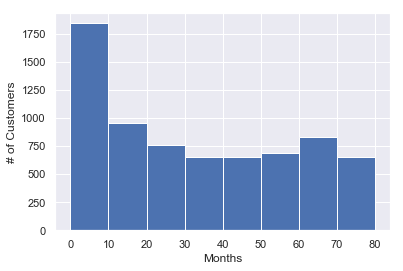

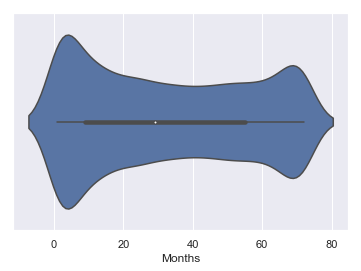

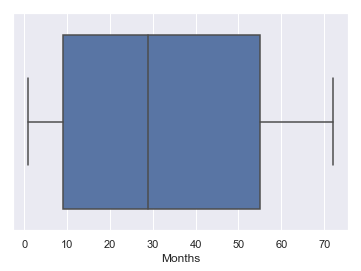

29.0

In [148]:
plt.hist(churndata['tenure'],bins=[0,10,20,30,40,50,60,70,80])
plt.xlabel('Months')
plt.ylabel('# of Customers')
plt.show()
sns.violinplot(churndata['tenure'])
plt.xlabel('Months')
plt.show()
sns.boxplot(churndata['tenure'])
plt.xlabel('Months')
plt.show()
churndata['tenure'].median()

#### The longer tenure reduces the probability of churn. 

,mean,std
Churn,,
0,37.650010,24.076940
1,17.979133,19.531123


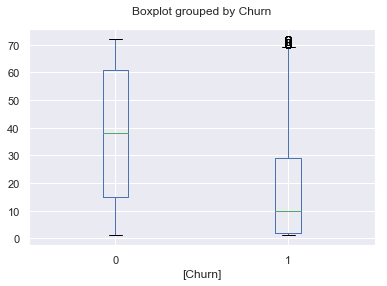

In [149]:
churndata.boxplot(column=['tenure'],by = ['Churn']) 
#.set_yscale('log')
plt.title('')
pd.DataFrame(churndata.groupby( ['Churn'])['tenure'].describe().loc[:,['mean','std']])

For the statistical test, 
Null hypothesis is that there is no difference between the continous variable values segmented by churn variable
Alternate hypothesis is that there is a difference between the continous variable values segmented by churn variable

#### Mann Whitney U-test
using mann whitney u-test here instead of t-test because the continuos variable isn't normally distributed. Sometimes t-test can still be used if we have large sample and mean/median are close. 

In [150]:
#is this difference statistically significant 

x = churndata['tenure'].loc[churndata['Churn']==0].values
y = churndata['tenure'].loc[churndata['Churn']==1].values

pvalue = scs.mannwhitneyu(x,y).pvalue 

print("P-value:",pvalue)

flag = pvalue <= 0.05

print("Statistically significant:", flag)

P-value: 3.0215232904413584e-211
Statistically significant: True


Since p-value is less 0.05 (which is our alpha), we are rejecting the null and accepting the alternate hypothesis

### Monthly Charges
The biggest spike is in the # of customers that spend 30 or less a month.
Average customer pays ~65 per month

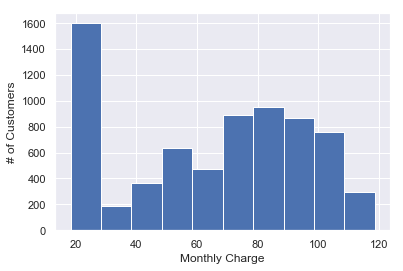

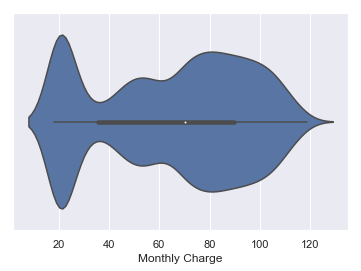

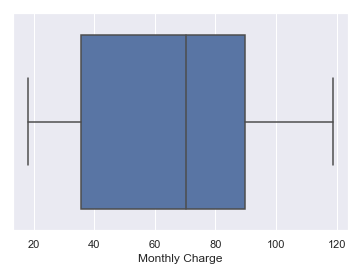

64.79820819112632

In [151]:
plt.hist(churndata['MonthlyCharges'])
plt.xlabel('Monthly Charge')
plt.ylabel('# of Customers')
plt.show()
sns.violinplot(churndata['MonthlyCharges'])
plt.xlabel('Monthly Charge')
plt.show()
sns.boxplot(churndata['MonthlyCharges'])
plt.xlabel('Monthly Charge')
plt.show()
churndata['MonthlyCharges'].median()
churndata['MonthlyCharges'].mean()

#### Higher monthly charges increases the probability of churn

,mean,std
Churn,,
0,61.307408,31.094557
1,74.441332,24.666053


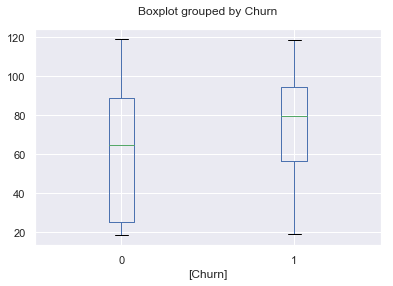

In [152]:
churndata.boxplot(column=['MonthlyCharges'],by = ['Churn'])
#.set_yscale('log')
plt.title('')
pd.DataFrame(churndata.groupby( ['Churn'])['MonthlyCharges'].describe().loc[:,['mean','std']])

In [153]:
#is this difference statistically significant 

x = churndata['MonthlyCharges'].loc[churndata['Churn']==0].values
y = churndata['MonthlyCharges'].loc[churndata['Churn']==1].values

pvalue = scs.mannwhitneyu(x,y).pvalue

print("P-value:",pvalue)

flag = pvalue <= 0.05

print("Statistically significant:", flag)

P-value: 4.2335975222743747e-54
Statistically significant: True


### Total charges
Total charges is left skewed with 50% of customers paying ~$1400 

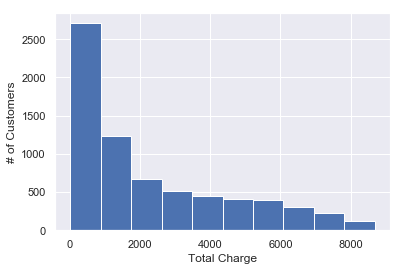

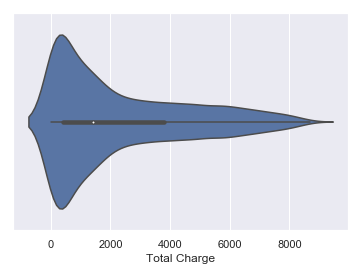

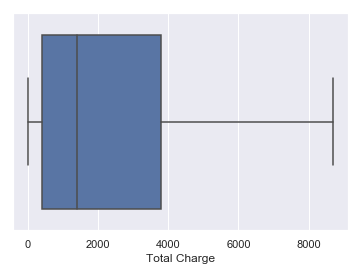

1397.475

In [154]:
plt.hist(churndata['TotalCharges'])
plt.xlabel('Total Charge')
plt.ylabel('# of Customers')
plt.show()
sns.violinplot(churndata['TotalCharges'])
plt.xlabel('Total Charge')
plt.show()
sns.boxplot(churndata['TotalCharges'])
plt.xlabel('Total Charge')
plt.show()
churndata['TotalCharges'].median()

#### Total charges is multiplication of tenure and monthly charges and we will to remove this variable since it's redundant.

,mean,std
Churn,,
0,2555.344141,2329.456984
1,1531.796094,1890.822994


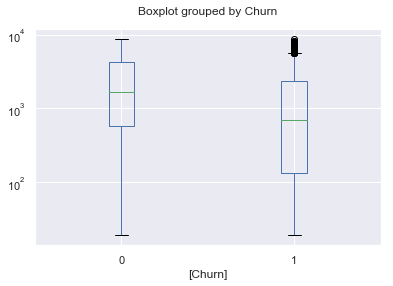

In [155]:
churndata.boxplot(column=['TotalCharges'],by = ['Churn']).set_yscale('log')
plt.title('')
pd.DataFrame(churndata.groupby( ['Churn'])['TotalCharges'].describe().loc[:,['mean','std']])

In [156]:
#is this difference statistically significant 

x = churndata['TotalCharges'].loc[churndata['Churn']==0].values
y = churndata['TotalCharges'].loc[churndata['Churn']==1].values

pvalue = scs.mannwhitneyu(x,y).pvalue

print("P-value:",pvalue)

flag = pvalue <= 0.05

print("Statistically significant:", flag)

P-value: 9.979924469422913e-85
Statistically significant: True


## 3b. Exploratory data analysis of categorical variables


In [157]:
#for col in churndata:
#    if churndata[col].dtype == np.object:
#        col
#        plt.figure()
#        sns.countplot(churndata[col])

####  gender

gender doesn't seem to change churn probability on it's own 

,Churn
gender,
Female,0.269595
Male,0.262046


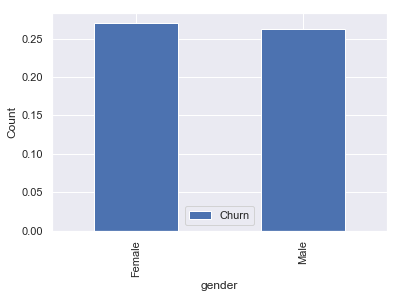

In [158]:
churndata.groupby(['gender'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['gender' ])[['Churn']].mean()

In [159]:
#is this statistically significant? 
m = ols('Churn ~ gender',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5133
Date:                Sat, 06 Jul 2019   Prob (F-statistic):              0.474
Time:                        11:00:23   Log-Likelihood:                -4232.5
No. Observations:                7032   AIC:                             8469.
Df Residuals:                    7030   BIC:                             8483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2696      0.007     36.014      0.000       0.255       0.284
gender[T.Male]    -0.0075      0.011     -0.716      0.474      -0.028       0.013
==============================================================================
Omnibus:                     1761.856   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.104
Skew:                           1.060   Prob(JB):                         0.00
Kurtosis:                       2.125   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Male      3549
Female    3483
Name: gender, dtype: int64

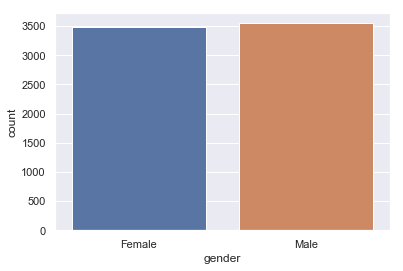

In [160]:
sns.countplot(churndata['gender'])
churndata['gender'].value_counts()

#### SeniorCitizen

A senior citizen is more likely to churn

,Churn
SeniorCitizen,
0,0.236503
1,0.416813


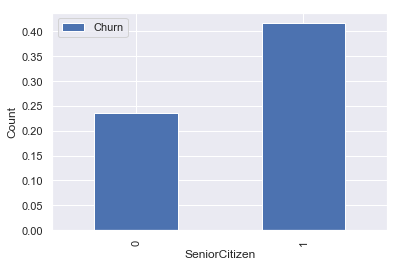

In [161]:
churndata.groupby(['SeniorCitizen'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['SeniorCitizen' ])[['Churn']].mean()

In [162]:
#churndata2 = churndata
#churndata2['intercept'] = 1 
#logit = sm.logit(churndata2['Churn'], churndata2[['intercept','SeniorCitizen']])
#result.summary()
#df['intercept'] = 1 df['typ_a', 'typ_b', 'typ_c'] = pd.get_dummies(df2['roomtype'])
#logit = sm.logit(df2['price'], df2[['intercept','typ_a', 'typ_b']])
#result.summary()

In [163]:
#is this statistically significant? 
m = ols('Churn ~ SeniorCitizen',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           6.38e-37
Time:                        11:00:24   Log-Likelihood:                -4152.2
No. Observations:                7032   AIC:                             8308.
Df Residuals:                    7030   BIC:                             8322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2365      0.006     41.556      0.000       0.225       0.248
SeniorCitizen     0.1803      0.014     12.768      0.000       0.153       0.208
==============================================================================
Omnibus:                     1474.753   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1445.216
Skew:                           1.036   Prob(JB):                         0.00
Kurtosis:                       2.199   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

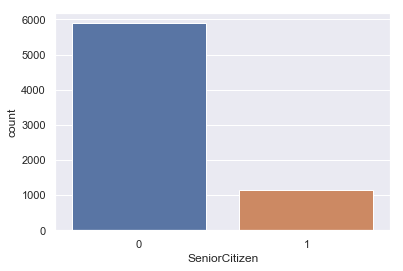

In [164]:
sns.countplot(churndata['SeniorCitizen'])
churndata['SeniorCitizen'].value_counts()

#### Partner

customers with parnters are less likely to churn

,Churn
Partner,
0,0.329761
1,0.197171


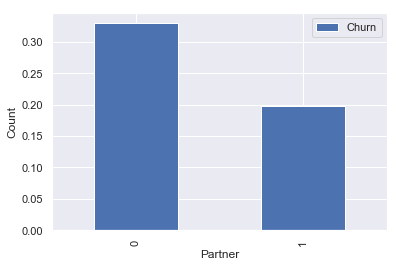

In [165]:
churndata.groupby(['Partner'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['Partner' ])[['Churn']].mean()

In [166]:
#is this statistically significant? 
m = ols('Churn ~ Partner',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     161.8
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           1.17e-36
Time:                        11:00:24   Log-Likelihood:                -4152.8
No. Observations:                7032   AIC:                             8310.
Df Residuals:                    7030   BIC:                             8323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3298      0.007     45.540      0.000       0.316       0.344
Partner       -0.1326      0.010    -12.719      0.000      -0.153      -0.112
==============================================================================
Omnibus:                     1576.389   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1431.822
Skew:                           1.023   Prob(JB):                    1.21e-311
Kurtosis:                       2.161   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    3639
1    3393
Name: Partner, dtype: int64

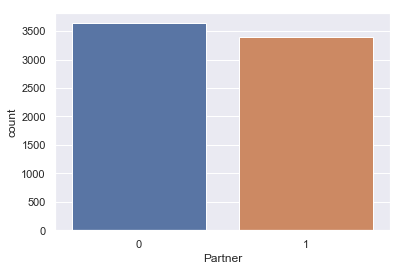

In [167]:
sns.countplot(churndata['Partner'])
churndata['Partner'].value_counts()

#### Dependents

customers with dependents are less likely to churn

,Churn
Dependents,
0,0.312791
1,0.155312


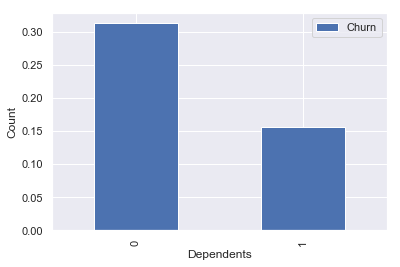

In [168]:
churndata.groupby(['Dependents'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['Dependents' ])[['Churn']].mean()

In [169]:
#is this statistically significant? 
m = ols('Churn ~ Dependents',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           3.90e-43
Time:                        11:00:25   Log-Likelihood:                -4137.9
No. Observations:                7032   AIC:                             8280.
Df Residuals:                    7030   BIC:                             8294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3128      0.006     50.400      0.000       0.301       0.325
Dependents    -0.1575      0.011    -13.863      0.000      -0.180      -0.135
==============================================================================
Omnibus:                     1626.003   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.485
Skew:                           1.008   Prob(JB):                    3.85e-306
Kurtosis:                       2.142   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    4933
1    2099
Name: Dependents, dtype: int64

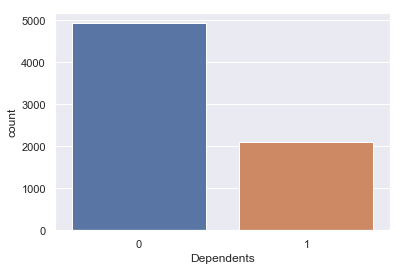

In [170]:
sns.countplot(churndata['Dependents'])
churndata['Dependents'].value_counts()

#### PhoneService

Phone service doesn't seem to have a significant enough difference on churn likelihood on it's own

,Churn
PhoneService,
0,0.250000
1,0.267475


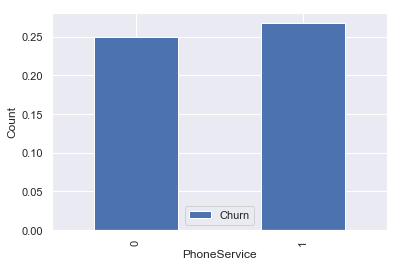

In [171]:
churndata.groupby(['PhoneService'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['PhoneService' ])[['Churn']].mean()

In [172]:
#is this statistically significant? 
m = ols('Churn ~ PhoneService',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9611
Date:                Sat, 06 Jul 2019   Prob (F-statistic):              0.327
Time:                        11:00:25   Log-Likelihood:                -4232.3
No. Observations:                7032   AIC:                             8469.
Df Residuals:                    7030   BIC:                             8482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2500      0.017     14.757      0.000       0.217       0.283
PhoneService     0.0175      0.018      0.980      0.327      -0.017       0.052
==============================================================================
Omnibus:                     1761.374   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1541.788
Skew:                           1.060   Prob(JB):                         0.00
Kurtosis:                       2.125   Cond. No.                         6.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1    6352
0     680
Name: PhoneService, dtype: int64

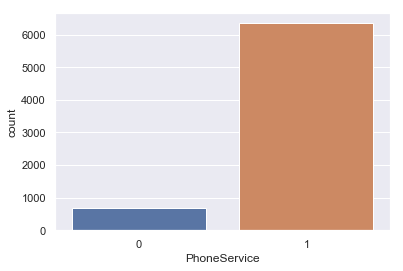

In [173]:
sns.countplot(churndata['PhoneService'])
churndata['PhoneService'].value_counts()

#### MultipleLines

Multiple lines customer are slightly higher likely to churn and the difference is statistically significant. 

,Churn
MultipleLines,
0,0.250677
1,0.286485


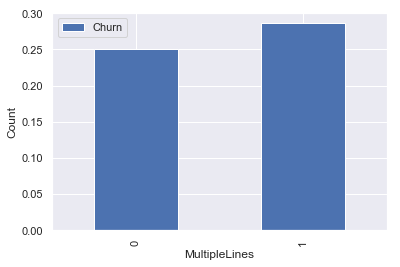

In [174]:
churndata.groupby(['MultipleLines'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['MultipleLines' ])[['Churn']].mean()

In [175]:
#is this statistically significant? 
m = ols('Churn ~ MultipleLines',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.28
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           0.000786
Time:                        11:00:26   Log-Likelihood:                -4227.1
No. Observations:                7032   AIC:                             8458.
Df Residuals:                    7030   BIC:                             8472.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2507      0.007     36.204      0.000       0.237       0.264
MultipleLines     0.0358      0.011      3.359      0.001       0.015       0.057
==============================================================================
Omnibus:                     1747.353   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1534.712
Skew:                           1.058   Prob(JB):                         0.00
Kurtosis:                       2.127   Cond. No.                         2.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    4065
1    2967
Name: MultipleLines, dtype: int64

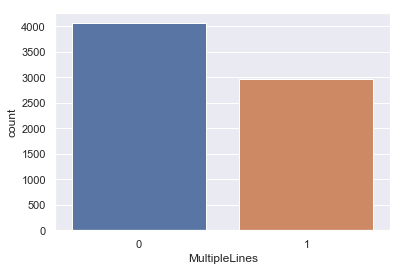

In [176]:
sns.countplot(churndata['MultipleLines'])
churndata['MultipleLines'].value_counts()

#### InternetService

Internet service customers that have Fiber optic are more likely to churn compared to customers that have DSL and don't have internet service

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


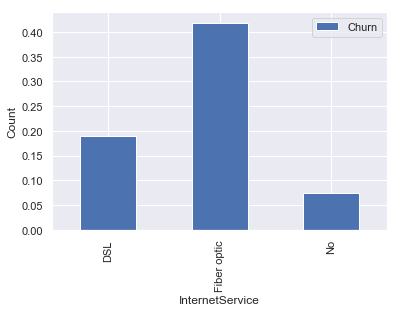

In [177]:
churndata.groupby(['InternetService'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['InternetService' ])[['Churn']].mean()

In [178]:
#is this statistically significant? 
m = ols('Churn ~ InternetService',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     406.3
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          1.06e-167
Time:                        11:00:26   Log-Likelihood:                -3848.1
No. Observations:                7032   AIC:                             7702.
Df Residuals:                    7029   BIC:                             7723.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.1900      0.009     22.323      0.000       0.173       0.207
InternetService[T.Fiber optic]     0.2289      0.011     20.161      0.000       0.207       0.251
InternetService[T.No]             -0.1156      0.014     -8.444      0.000      -0.142      -0.089
==============================================================================
Omnibus:                     1105.033   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1024.373
Skew:                           0.859   Prob(JB):                    3.63e-223
Kurtosis:                       2.261   Cond. No.                         3.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

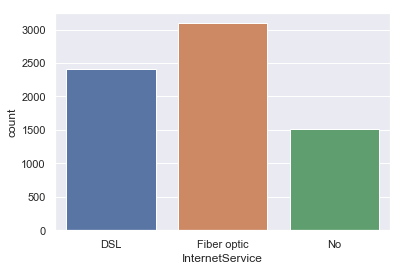

In [179]:
sns.countplot(churndata['InternetService'])
churndata['InternetService'].value_counts()

#### OnlineSecurity

Customers who have online security are less likely to churn. 

,Churn
OnlineSecurity,
0,0.313733
1,0.146402


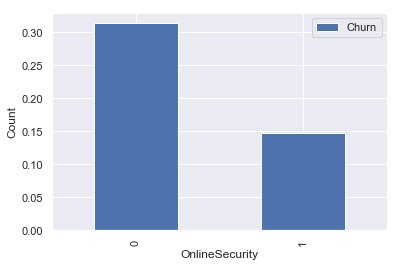

In [180]:
churndata.groupby(['OnlineSecurity'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['OnlineSecurity' ])[['Churn']].mean()

In [181]:
#is this statistically significant? 
m = ols('Churn ~ OnlineSecurity',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     212.4
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           1.97e-47
Time:                        11:00:27   Log-Likelihood:                -4128.1
No. Observations:                7032   AIC:                             8260.
Df Residuals:                    7030   BIC:                             8274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3137      0.006     51.052      0.000       0.302       0.326
OnlineSecurity    -0.1673      0.011    -14.576      0.000      -0.190      -0.145
==============================================================================
Omnibus:                     1627.293   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1391.916
Skew:                           1.001   Prob(JB):                    5.62e-303
Kurtosis:                       2.140   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    5017
1    2015
Name: OnlineSecurity, dtype: int64

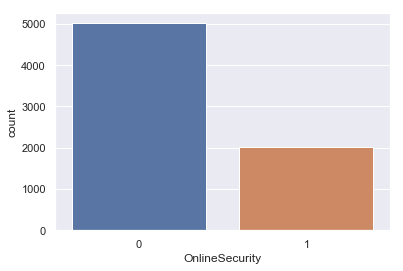

In [182]:
sns.countplot(churndata['OnlineSecurity'])
churndata['OnlineSecurity'].value_counts()

#### OnlineBackup

Customers who have online backup are less likely to churn

,Churn
OnlineBackup,
0,0.292164
1,0.215670


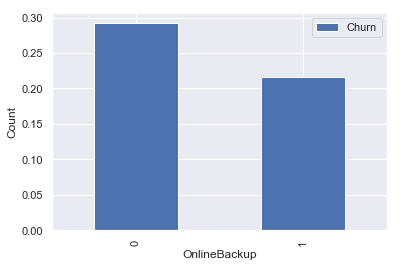

In [183]:
churndata.groupby(['OnlineBackup'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['OnlineBackup' ])[['Churn']].mean()

In [184]:
#is this statistically significant? 
m = ols('Churn ~ OnlineBackup',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     47.95
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           4.76e-12
Time:                        11:00:27   Log-Likelihood:                -4208.9
No. Observations:                7032   AIC:                             8422.
Df Residuals:                    7030   BIC:                             8435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2922      0.006     45.037      0.000       0.279       0.305
OnlineBackup    -0.0765      0.011     -6.925      0.000      -0.098      -0.055
==============================================================================
Omnibus:                     1710.077   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1508.899
Skew:                           1.049   Prob(JB):                         0.00
Kurtosis:                       2.134   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    4607
1    2425
Name: OnlineBackup, dtype: int64

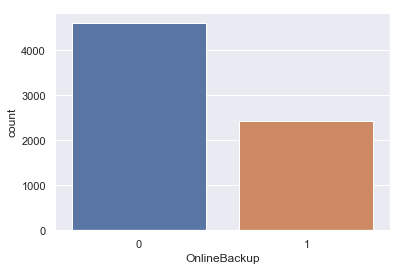

In [185]:
sns.countplot(churndata['OnlineBackup'])
churndata['OnlineBackup'].value_counts()


#### Device Protection

Customers who have device protection are less likely to churn. 

,Churn
DeviceProtection,
0,0.286953
1,0.225393


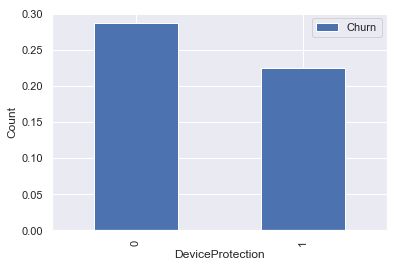

In [186]:
churndata.groupby(['DeviceProtection'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['DeviceProtection'])[['Churn']].mean()

In [187]:
#is this statistically significant? 
m = ols('Churn ~ DeviceProtection',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     30.94
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           2.76e-08
Time:                        11:00:28   Log-Likelihood:                -4217.3
No. Observations:                7032   AIC:                             8439.
Df Residuals:                    7030   BIC:                             8452.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2870      0.006     44.214      0.000       0.274       0.300
DeviceProtection    -0.0616      0.011     -5.562      0.000      -0.083      -0.040
==============================================================================
Omnibus:                     1727.245   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1520.845
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                       2.131   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    4614
1    2418
Name: DeviceProtection, dtype: int64

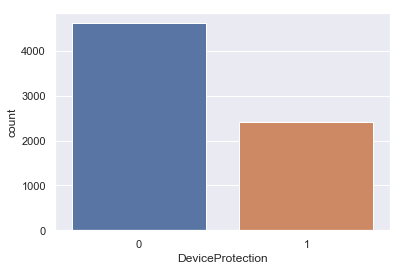

In [188]:
sns.countplot(churndata['DeviceProtection'])
churndata['DeviceProtection'].value_counts()

#### TechSupport

Customers who have tech support are less likely to churn

,Churn
TechSupport,
0,0.312300
1,0.151961


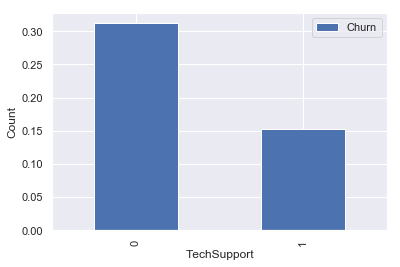

In [189]:
churndata.groupby(['TechSupport'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['TechSupport' ])[['Churn']].mean()

In [190]:
#is this statistically significant? 
m = ols('Churn ~ TechSupport',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     196.1
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           5.89e-44
Time:                        11:00:28   Log-Likelihood:                -4136.0
No. Observations:                7032   AIC:                             8276.
Df Residuals:                    7030   BIC:                             8290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3123      0.006     50.634      0.000       0.300       0.324
TechSupport    -0.1603      0.011    -14.002      0.000      -0.183      -0.138
==============================================================================
Omnibus:                     1629.751   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.553
Skew:                           1.007   Prob(JB):                    1.67e-305
Kurtosis:                       2.141   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    4992
1    2040
Name: TechSupport, dtype: int64

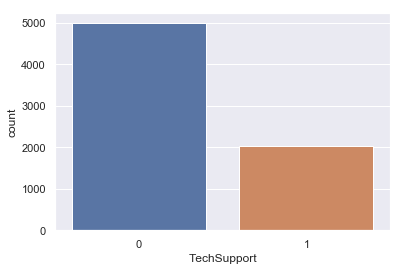

In [191]:
sns.countplot(churndata['TechSupport'])
churndata['TechSupport'].value_counts()

#### StreamingTV

Customers who have Steaming TV are more likely to churn

,Churn
StreamingTV,
0,0.243705
1,0.301147


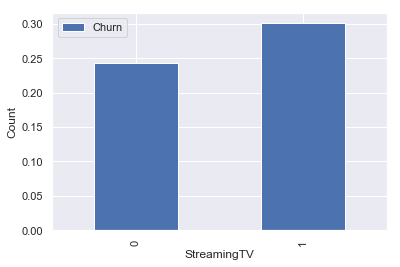

In [192]:
churndata.groupby(['StreamingTV'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['StreamingTV' ])[['Churn']].mean()

In [193]:
#is this statistically significant? 
m = ols('Churn ~ StreamingTV',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     28.24
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           1.10e-07
Time:                        11:00:29   Log-Likelihood:                -4218.7
No. Observations:                7032   AIC:                             8441.
Df Residuals:                    7030   BIC:                             8455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2437      0.007     36.366      0.000       0.231       0.257
StreamingTV     0.0574      0.011      5.314      0.000       0.036       0.079
==============================================================================
Omnibus:                     1723.447   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1523.221
Skew:                           1.054   Prob(JB):                         0.00
Kurtosis:                       2.132   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    4329
1    2703
Name: StreamingTV, dtype: int64

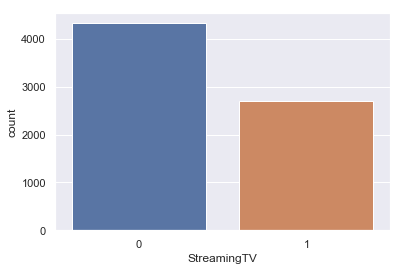

In [194]:
sns.countplot(churndata['StreamingTV'])
churndata['StreamingTV'].value_counts()

#### StreamingMovies

Customers who have streaming movies are more likley to churn

,Churn
StreamingMovies,
0,0.244362
1,0.299524


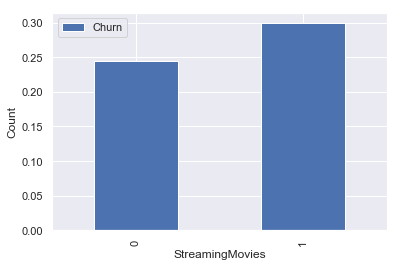

In [195]:
churndata.groupby(['StreamingMovies'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['StreamingMovies' ])[['Churn']].mean()

In [196]:
#is this statistically significant? 
m = ols('Churn ~ StreamingMovies',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     26.14
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           3.27e-07
Time:                        11:00:30   Log-Likelihood:                -4219.7
No. Observations:                7032   AIC:                             8443.
Df Residuals:                    7030   BIC:                             8457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2444      0.007     36.340      0.000       0.231       0.258
StreamingMovies     0.0552      0.011      5.112      0.000       0.034       0.076
==============================================================================
Omnibus:                     1726.484   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1524.637
Skew:                           1.055   Prob(JB):                         0.00
Kurtosis:                       2.132   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0    4301
1    2731
Name: StreamingMovies, dtype: int64

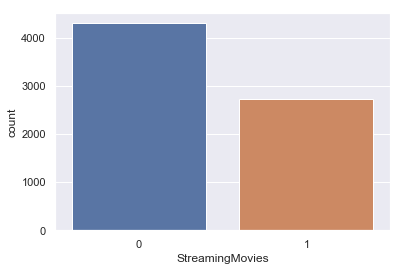

In [197]:
sns.countplot(churndata['StreamingMovies'])
churndata['StreamingMovies'].value_counts()

#### Contract

Customers who are on month-to-month compared to 1/2 year contracts are more likely to churn

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


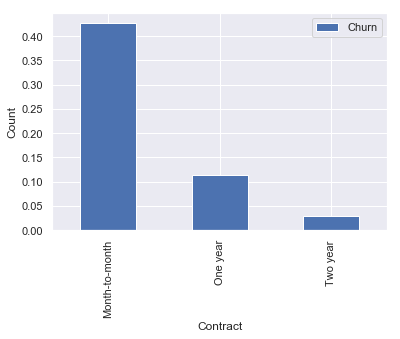

In [198]:
churndata.groupby(['Contract'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['Contract'])[['Churn']].mean()

In [199]:
#is this statistically significant? 
m = ols('Churn ~ Contract',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     708.3
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          5.63e-281
Time:                        11:00:31   Log-Likelihood:                -3587.2
No. Observations:                7032   AIC:                             7180.
Df Residuals:                    7029   BIC:                             7201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4271      0.006     65.957      0.000       0.414       0.440
Contract[T.One year]    -0.3143      0.012    -25.469      0.000      -0.339      -0.290
Contract[T.Two year]    -0.3986      0.012    -33.888      0.000      -0.422      -0.376
==============================================================================
Omnibus:                     1179.599   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              699.524
Skew:                           0.644   Prob(JB):                    1.26e-152
Kurtosis:                       2.146   Cond. No.                         3.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

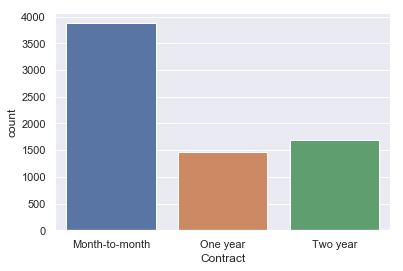

In [200]:
sns.countplot(churndata['Contract'])
churndata['Contract'].value_counts()

#### PaperlessBilling

Customers with Paperless Billing have higher likelihood to churn

,Churn
PaperlessBilling,
0,0.163757
1,0.335893


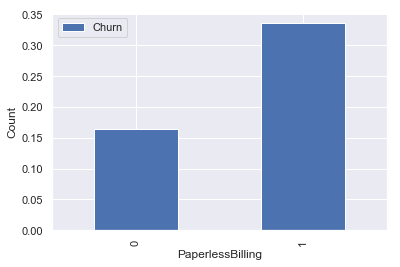

In [201]:
churndata.groupby(['PaperlessBilling'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['PaperlessBilling'])[['Churn']].mean()

In [202]:
#is this statistically significant? 
m = ols('Churn ~ PaperlessBilling',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     267.5
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           4.88e-59
Time:                        11:00:31   Log-Likelihood:                -4101.5
No. Observations:                7032   AIC:                             8207.
Df Residuals:                    7030   BIC:                             8221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1638      0.008     20.210      0.000       0.148       0.180
PaperlessBilling     0.1721      0.011     16.355      0.000       0.152       0.193
==============================================================================
Omnibus:                     1518.339   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1357.742
Skew:                           0.993   Prob(JB):                    1.48e-295
Kurtosis:                       2.167   Cond. No.                         2.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1    4168
0    2864
Name: PaperlessBilling, dtype: int64

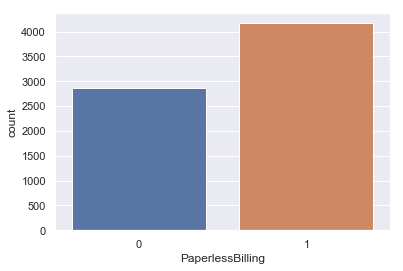

In [203]:
sns.countplot(churndata['PaperlessBilling'])
churndata['PaperlessBilling'].value_counts()

#### PaymentMethod

Customers with eletronic check have higher likelihood to churn compared to other payment methods

,Churn
PaymentMethod,
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531
Electronic check,0.452854
Mailed check,0.192020


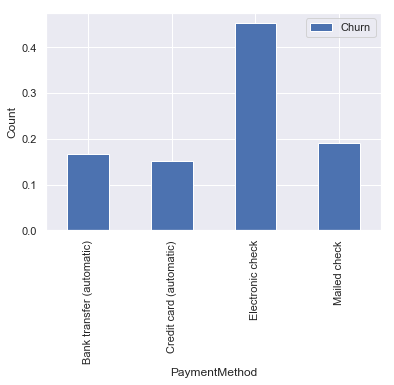

In [204]:
churndata.groupby(['PaymentMethod'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['PaymentMethod'])[['Churn']].mean()

In [205]:
#is this statistically significant? 
m = ols('Churn ~ PaymentMethod',churndata).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     236.8
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          2.41e-146
Time:                        11:00:32   Log-Likelihood:                -3894.3
No. Observations:                7032   AIC:                             7797.
Df Residuals:                    7028   BIC:                             7824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.1673      0.011     15.602      0.000       0.146       0.188
PaymentMethod[T.Credit card (automatic)]    -0.0148      0.015     -0.971      0.331      -0.045       0.015
PaymentMethod[T.Electronic check]            0.2855      0.014     20.716      0.000       0.259       0.313
PaymentMethod[T.Mailed check]                0.0247      0.015      1.645      0.100      -0.005       0.054
==============================================================================
Omnibus:                      980.531   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1121.884
Skew:                           0.930   Prob(JB):                    2.43e-244
Kurtosis:                       2.394   Cond. No.                         5.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

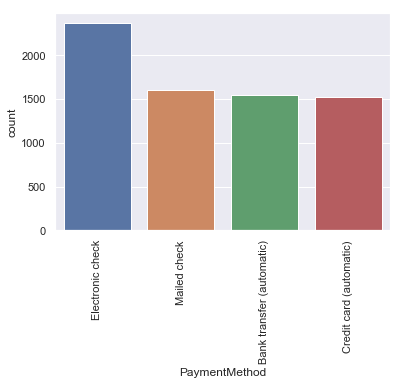

In [206]:
sns.countplot(churndata['PaymentMethod'])
plt.xticks(rotation=90)
churndata['PaymentMethod'].value_counts()

### Churn (Target variable)

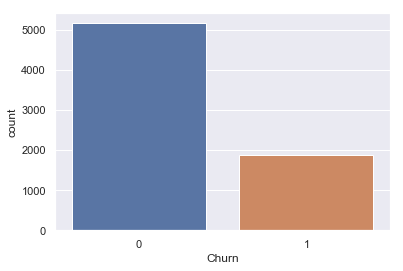

In [207]:
sns.countplot(churndata['Churn'])

In [208]:
print("overall counts:")
churndata['Churn'].value_counts()

overall counts:


0    5163
1    1869
Name: Churn, dtype: int64

In [209]:
print("frequency counts:")
churndata['Churn'].value_counts(normalize=True)

frequency counts:


0    0.734215
1    0.265785
Name: Churn, dtype: float64

## Step 4. Machine Learning (Model Training & Testing)

### 4a. Train & Test set

- Adding Dummy variables
- Removing columns that aren't needed

In [210]:
churndata.info()
churndata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID            7032 non-null object
gender                7032 non-null object
SeniorCitizen         7032 non-null int64
Partner               7032 non-null int64
Dependents            7032 non-null int64
tenure                7032 non-null int64
PhoneService          7032 non-null int64
MultipleLines         7032 non-null int64
InternetService       7032 non-null object
OnlineSecurity        7032 non-null int64
OnlineBackup          7032 non-null int64
DeviceProtection      7032 non-null int64
TechSupport           7032 non-null int64
StreamingTV           7032 non-null int64
StreamingMovies       7032 non-null int64
Contract              7032 non-null object
PaperlessBilling      7032 non-null int64
PaymentMethod         7032 non-null object
MonthlyCharges        7032 non-null float64
TotalCharges          7032 non-null float64
Churn                 7032 non-null int64
Ha

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


In [211]:
#Get Dummy variables
cols_to_transform = [ 'gender', 'InternetService', 'Contract', 'PaymentMethod']
churndata = pd.get_dummies(data=churndata, columns = cols_to_transform,drop_first=True)
churndata.info()
churndata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
customerID                               7032 non-null object
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
MultipleLines                            7032 non-null int64
OnlineSecurity                           7032 non-null int64
OnlineBackup                             7032 non-null int64
DeviceProtection                         7032 non-null int64
TechSupport                              7032 non-null int64
StreamingTV                              7032 non-null int64
StreamingMovies                          7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                        

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,HasInternetService,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,1,1,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0


In [212]:
churndata=churndata.drop(['customerID'], axis=1)
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
MultipleLines                            7032 non-null int64
OnlineSecurity                           7032 non-null int64
OnlineBackup                             7032 non-null int64
DeviceProtection                         7032 non-null int64
TechSupport                              7032 non-null int64
StreamingTV                              7032 non-null int64
StreamingMovies                          7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                         

In [213]:
churndata=churndata.drop(['TotalCharges'], axis=1)
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
MultipleLines                            7032 non-null int64
OnlineSecurity                           7032 non-null int64
OnlineBackup                             7032 non-null int64
DeviceProtection                         7032 non-null int64
TechSupport                              7032 non-null int64
StreamingTV                              7032 non-null int64
StreamingMovies                          7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                           7032 non-null float64
Churn                                

In [214]:
y = churndata['Churn']
x = churndata.drop(['Churn'], axis=1)

# Split the data into a training and test set.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=5)

### 4b. Logistic Regression

In [215]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(xtrain, ytrain)
# Print the accuracy from the testing data.
ypred = clf.predict(xtest)

In [216]:
#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(ytest,ypred))

Confusion Matrix:
[[1114  153]
 [ 221  270]]


In [217]:
#print accuracy
print("Accuracy:")
print(accuracy_score(ypred, ytest))

Accuracy:
0.7872582480091013


In [218]:
print("Classification Report:")
print(classification_report(ytest, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1267
           1       0.64      0.55      0.59       491

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



Roc Curve:


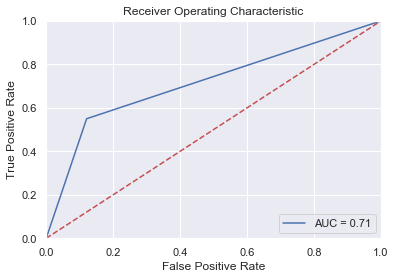

In [219]:
print("Roc Curve:")
fpr, tpr, threshold = roc_curve(ytest,ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4c. Decision Tree

In [220]:
#we will try both balanced and imbalanced decision trees

#### Imbalanced Decision Tree

In [221]:
#first imbalanced

clf = DecisionTreeClassifier()
# Fit the model on the trainng data.
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

In [222]:
#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(ytest,ypred))

Confusion Matrix:
[[1036  231]
 [ 231  260]]


In [223]:
#print accuracy
print("Accuracy:")
print(accuracy_score(ypred, ytest))

Accuracy:
0.7372013651877133


In [224]:
print("Classification Report:")
print(classification_report(ytest, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1267
           1       0.53      0.53      0.53       491

   micro avg       0.74      0.74      0.74      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.74      0.74      0.74      1758



Roc Curve:


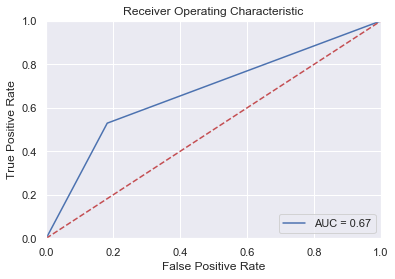

In [225]:
print("Roc Curve:")
fpr, tpr, threshold = roc_curve(ytest,ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### balanced Decision Tree

In [226]:
#second balanced

clf = DecisionTreeClassifier(class_weight="balanced")
# Fit the model on the trainng data.
clf.fit(xtrain, ytrain)
# Print the accuracy from the testing data.
ypred = clf.predict(xtest)

In [227]:
#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(ytest,ypred))

Confusion Matrix:
[[1037  230]
 [ 252  239]]


In [228]:
#print accuracy
print("Accuracy:")
print(accuracy_score(ypred, ytest))

Accuracy:
0.7258248009101251


In [229]:
print("Classification Report:")
print(classification_report(ytest, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1267
           1       0.51      0.49      0.50       491

   micro avg       0.73      0.73      0.73      1758
   macro avg       0.66      0.65      0.65      1758
weighted avg       0.72      0.73      0.72      1758



Roc Curve:


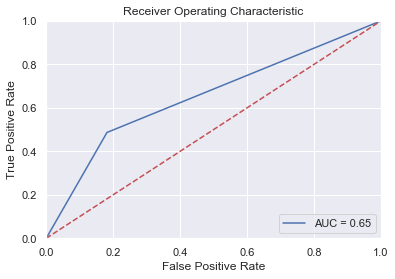

In [230]:
print("Roc Curve:")
fpr, tpr, threshold = roc_curve(ytest,ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4d. Random Forest & Feature Importance

In [231]:
clf=RandomForestClassifier()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)


In [232]:
print("RF Accuracy:",metrics.accuracy_score(ytest, ypred))

RF Accuracy: 0.7753128555176336


In [233]:
metrics.roc_auc_score(ytest, ypred)

0.6825824590055891

In [234]:
#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(ytest,ypred))

Confusion Matrix:
[[1131  136]
 [ 259  232]]


In [235]:
print("Classification Report:")
print(classification_report(ytest, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1267
           1       0.63      0.47      0.54       491

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.72      0.68      0.70      1758
weighted avg       0.76      0.78      0.76      1758



Roc Curve:


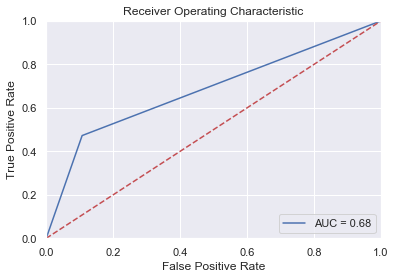

In [236]:
print("Roc Curve:")
fpr, tpr, threshold = roc_curve(ytest,ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [237]:
features_df = churndata.drop(['Churn'],axis=1)
feature_imp = pd.Series(clf.feature_importances_,index=features_df.columns.values).sort_values(ascending=False)
feature_imp

tenure                                   0.239277
MonthlyCharges                           0.232252
PaymentMethod_Electronic check           0.047831
InternetService_Fiber optic              0.035636
Contract_Two year                        0.033213
gender_Male                              0.031120
OnlineSecurity                           0.030893
SeniorCitizen                            0.029849
TechSupport                              0.029513
PaperlessBilling                         0.028533
Partner                                  0.027201
OnlineBackup                             0.026530
DeviceProtection                         0.024575
Dependents                               0.024217
MultipleLines                            0.023426
Contract_One year                        0.022147
StreamingTV                              0.021377
HasInternetService                       0.020901
StreamingMovies                          0.020292
PaymentMethod_Credit card (automatic)    0.017018


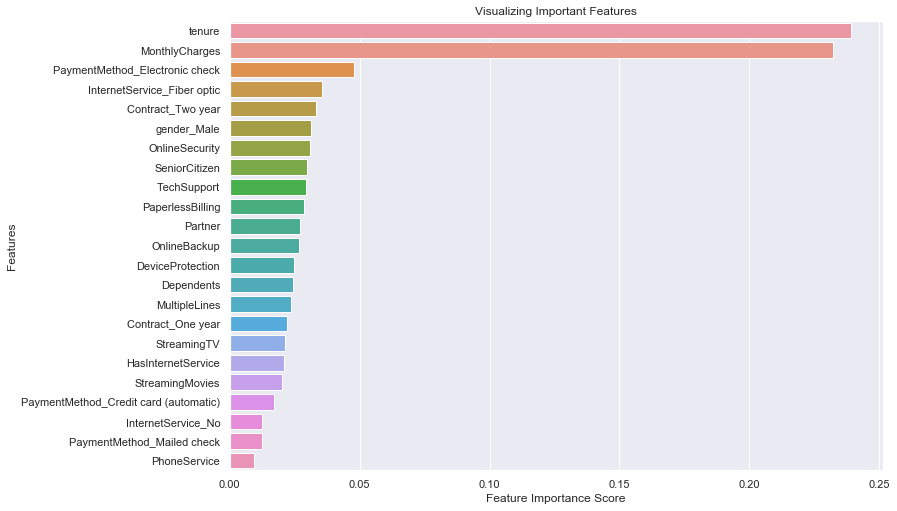

In [238]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### 4e. Gaussian process

In [239]:
from sklearn.gaussian_process import GaussianProcessClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html 

In [240]:
clf=GaussianProcessClassifier()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)

In [241]:
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.7633674630261661


In [242]:
metrics.roc_auc_score(ytest, ypred)

0.6892638929298808

In [243]:
#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(ytest,ypred))

Confusion Matrix:
[[1086  181]
 [ 235  256]]


In [244]:
print("Classification Report:")
print(classification_report(ytest, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1267
           1       0.59      0.52      0.55       491

   micro avg       0.76      0.76      0.76      1758
   macro avg       0.70      0.69      0.70      1758
weighted avg       0.76      0.76      0.76      1758



#### 4f XGBoost

In [245]:
import xgboost as xgb

In [246]:
clf=xgb.XGBClassifier()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)

In [247]:
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.7918088737201365


In [248]:
metrics.roc_auc_score(ytest, ypred)

0.7083718455482023

In [249]:
#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(ytest,ypred))

Confusion Matrix:
[[1137  130]
 [ 236  255]]


In [250]:
print("Classification Report:")
print(classification_report(ytest, ypred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1267
           1       0.66      0.52      0.58       491

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



## Step 5. Inference

### What is question that we asking? What is the business action taken based on the data? 

With the help of this model, we are identifying customers that are at-risk of churning. Based on this, we will target these customer cohort with marketing & product-based incentives to retain using our products. 

### What performance metric is important? 

Based on the business goal, we determined that it's very important that we identify all customers that are at-risk. As a part of this process, it will be acceptable if we target some customers that were not likely to churn but we still give them incentives. 

So, false positives are acceptable but false negatives (customers who eventually churned but the model didn't identify them) are not acceptable. 

With the goal of minimizing false negatives, we will identify models that have the lowest false negatives in the classification report. And since: Recall = True Positive / (True Positive + False Negative), we will use the classification report and identify models that have **higher Recall** but at the same time look at other metrics to ensure that the model is acceptable

Conclusion: we will pick the winning model that 
- Maximize recall
- Acceptable Accuracy, Precision, F1 Score, AUC

Since 73.4% of customers do NOT churn, the baseline accuracy without a predictive models which predicts that none of the customers churn is 0.734. A machine learning model should have a higher accuracy then the baseline. 

Winninig model should maximize recall and have an accuracy higher than 0.734

### Summarizing Model Preformance

| Model                | Recall | Accuracy | Precision | F1 Score | AUC    | 
|----------------------|--------|----------|-----------|----------|--------| 
| Logistic Regression  |  0.79  |  0.79    | 0.78      | 0.79     | 0.71   |  
| Decision Tree        |  0.74  |  0.74    | 0.74      | 0.74     | 0.68   |  
| Random Forest        |  0.77  |  0.77    | 0.75      | 0.77     | 0.67   |  
| Gaussian Process     |  0.76  |  0.76    | 0.76      | 0.76     | 0.69   |
| XGBoost              |  0.79  |  0.79    | 0.78      | 0.78     | 0.71   |

### Selecting two models for Hypertuning

Out of the models above, Logistic regression & XGBoost outperforms with highest recall while matching/excedding other models at other performance criteria's like Accuracy, Precision, F1 Score & AUC

So, let's tune logistic regression and XGBoost

### Tuning Logistic Regression

#### baseline model

In [251]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(xtrain, ytrain)
# Print the accuracy from the testing data.
ypred = clf.predict(xtest)

#print accuracy
print("Accuracy:")
print(accuracy_score(ypred, ytest))

print("Classification Report:")
print(classification_report(ytest, ypred))

Accuracy:
0.7872582480091013
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1267
           1       0.64      0.55      0.59       491

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



#### hypertuned model

In [252]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.1, 1, 10, 100, 1000]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [253]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(xtrain, ytrain)

C:\Users\doshpara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [255]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [256]:
#ypred = clf.predict(xtest)
ypred = best_model.predict(xtest)

#print accuracy
print("Accuracy:")
print(accuracy_score(ypred, ytest))

print("Classification Report:")
print(classification_report(ytest, ypred))

Accuracy:
0.7889647326507395
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1267
           1       0.64      0.55      0.59       491

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



### Tuning XGBoost

In [257]:
clf=xgb.XGBClassifier()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)

In [258]:
eval_set = [(xtrain, ytrain), (xtest, ytest)]
eval_metric = ["auc","error"]
%time clf.fit(xtrain, ytrain, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.812683	validation_0-error:0.204968	validation_1-auc:0.804689	validation_1-error:0.225256
[1]	validation_0-auc:0.824871	validation_0-error:0.204968	validation_1-auc:0.819016	validation_1-error:0.225256
[2]	validation_0-auc:0.827754	validation_0-error:0.204968	validation_1-auc:0.820055	validation_1-error:0.225256
[3]	validation_0-auc:0.830469	validation_0-error:0.204968	validation_1-auc:0.820855	validation_1-error:0.225256
[4]	validation_0-auc:0.835012	validation_0-error:0.20383	validation_1-auc:0.823942	validation_1-error:0.225825
[5]	validation_0-auc:0.836265	validation_0-error:0.202882	validation_1-auc:0.825133	validation_1-error:0.227531
[6]	validation_0-auc:0.842219	validation_0-error:0.202882	validation_1-auc:0.833442	validation_1-error:0.227531
[7]	validation_0-auc:0.842885	validation_0-error:0.202503	validation_1-auc:0.83351	validation_1-error:0.227531
[8]	validation_0-auc:0.843388	validation_0-error:0.202313	validation_1-auc:0.833806	validation_1-error:0.2

[73]	validation_0-auc:0.870468	validation_0-error:0.17956	validation_1-auc:0.843494	validation_1-error:0.206485
[74]	validation_0-auc:0.87074	validation_0-error:0.178612	validation_1-auc:0.843499	validation_1-error:0.205347
[75]	validation_0-auc:0.871003	validation_0-error:0.178422	validation_1-auc:0.843397	validation_1-error:0.204778
[76]	validation_0-auc:0.871333	validation_0-error:0.177285	validation_1-auc:0.843294	validation_1-error:0.204778
[77]	validation_0-auc:0.871539	validation_0-error:0.177474	validation_1-auc:0.843387	validation_1-error:0.205347
[78]	validation_0-auc:0.871753	validation_0-error:0.178422	validation_1-auc:0.84336	validation_1-error:0.204778
[79]	validation_0-auc:0.871863	validation_0-error:0.178612	validation_1-auc:0.84324	validation_1-error:0.204778
[80]	validation_0-auc:0.871975	validation_0-error:0.177664	validation_1-auc:0.843118	validation_1-error:0.204778
[81]	validation_0-auc:0.872173	validation_0-error:0.178422	validation_1-auc:0.842848	validation_1-er

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

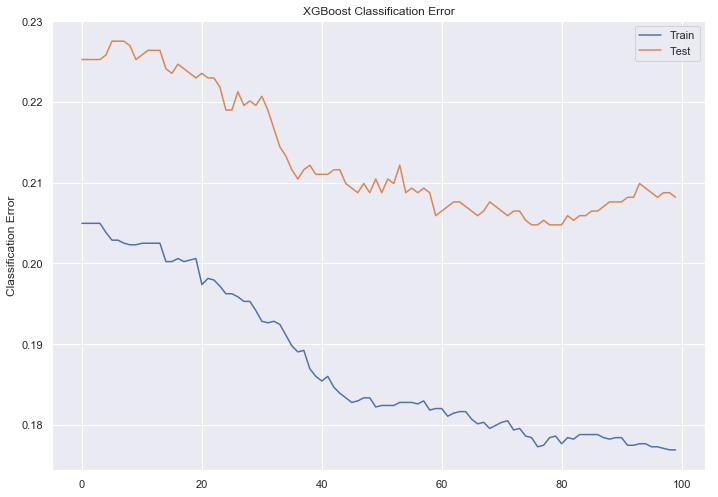

In [259]:
# plot classification error
results = clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [289]:
learning_rate = [0.01,0.02,0.05]
min_child_weight = [1, 5, 10]
subsample= [0.7, 0.8, 0.9]
colsample_bytree= [0.4]
n_estimators = [1000]
max_depth= [4,6,8]
reg_alpha = [0.3]

# Create hyperparameter options
hyperparameters = dict(reg_alpha=reg_alpha,n_estimators=n_estimators,learning_rate=learning_rate,min_child_weight=min_child_weight,subsample=subsample,max_depth=max_depth)

In [291]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xgb=xgb.XGBClassifier()

# Create grid search using 5-fold cross validation
clf = GridSearchCV(xgb, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(xtrain, ytrain)

In [292]:
#ypred = clf.predict(xtest)
ypred = best_model.predict(xtest)

#print accuracy
print("Accuracy:")
print(accuracy_score(ypred, ytest))

print("Classification Report:")
print(classification_report(ytest, ypred))

Accuracy:
0.7906712172923777
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1267
           1       0.65      0.54      0.59       491

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



In [260]:
model = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [261]:
model.fit(xtrain,ytrain)
ypred=clf.predict(xtest)

ypred = model.predict(xtest)

#print accuracy
print("Accuracy:")
print(accuracy_score(ypred, ytest))

print("Classification Report:")
print(classification_report(ytest, ypred))

Accuracy:
0.7940841865756542
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1267
           1       0.68      0.50      0.58       491

   micro avg       0.79      0.79      0.79      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.78      0.79      0.78      1758



### Winning Model

Tuned XGBoost is the winner. 